In [1]:
import math
import numpy as np
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
import openrtdynamics2.targets as tg

# Tracing and debugging

To enable tracing, add the flag 'enable_tracing' when configuring the code generation target and set it to True. Tracing output is generated with printf will go to the standard output (terminal).

In [2]:
system = dy.enter_system()

# define system inputs
u               = dy.system_input( dy.DataTypeFloat64(1), name='u', default_value=5.0,  value_range=[0, 25], title="input #1")

x   = dy.signal()

x_dot = 0 - 0.5 * x + u
x_dot.set_name('x_dot')   # add some names to the signals so it is possible to identify them in the traces

with dy.sub_if(condition_signal=dy.boolean(True), subsystem_name='if_subsystem') as system:

    # integrators
    x_ = dy.euler_integrator(x_dot, 0.01, 0)

    system.set_outputs([x_])

x << system.outputs[0]


    
# define output(s)
dy.append_output(x, 'x')

# generate code with tracing enabled
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal(enable_tracing=True), build=False)

#
dy.clear()


compiling system Sys1000_if_subsystem (level 1)... 
compiling system simulation (level 0)... 
enabled tracing for system simulation
enabled tracing for system Sys1000_if_subsystem


In [3]:
compiled_system = dyexe.CompiledCode(code_gen_results)
testsim = dyexe.SystemInstance(compiled_system)

In [4]:
sim_results = dyexe.run_batch_simulation(testsim, input_data={}, N=10 )
sim_results['x']

array([0.        , 0.05      , 0.09975   , 0.14925125, 0.19850499,
       0.24751247, 0.29627491, 0.34479353, 0.39306956, 0.44110422])

The output in the terminal from which you started jupyter lab should look as follows:

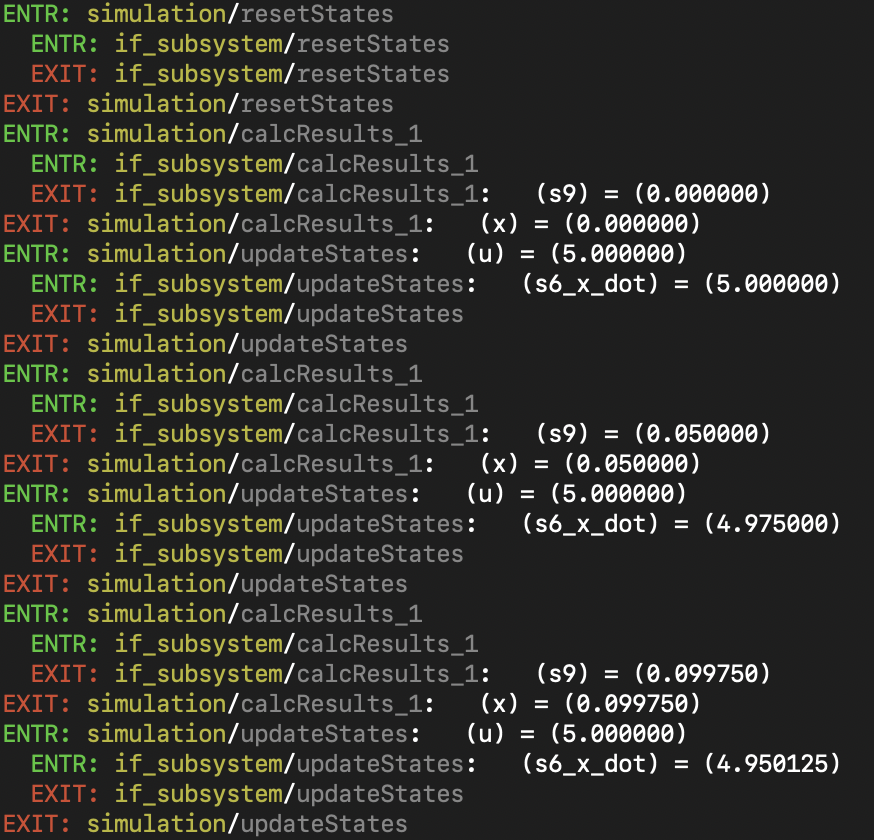



